## Radial Basis Functions revisted!

The modern implementation of RBFs accoutns for the *global* trend of the data through a polynomial least squares fit alongside normal RBFs for local features.

$$ \begin{align}
y(x) &= \sum_i^N \omega_i \varphi_i(\|x-x_i\|) + \sum_i^N P_i(x_i) b_i
\end{align} $$

Where $P_i$ is an order $n\lt m$ polynomial. The Numpy RBFInterpolator object fits this equation to:

$$ \begin{align}
[\Phi(x_i, x_j) -\lambda I]\omega +P(x_i) b &= y_i \\
P(x_i)^T \omega &=0
\end{align} $$

where $\lambda = 0$ recovers an exact fit and $\lambda \gt 0$ effecitvely shifts the fitting of the $x_i=x_j$ terms to the bestfit polynomial.

#### Example: Toy gaussian over a quadratic

In [ ]:
#Sampled gaussian

import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
  return np.exp(-(x/2)**2)+.1*x**2

# Create x values for plotting
x_toy = np.linspace(-6, 6, 100)
y_toy = f(x_toy)

# Sample 11 times at 1-interval intervals
x_d = np.arange(-5, 6, 1)
y_d = f(x_d)

11


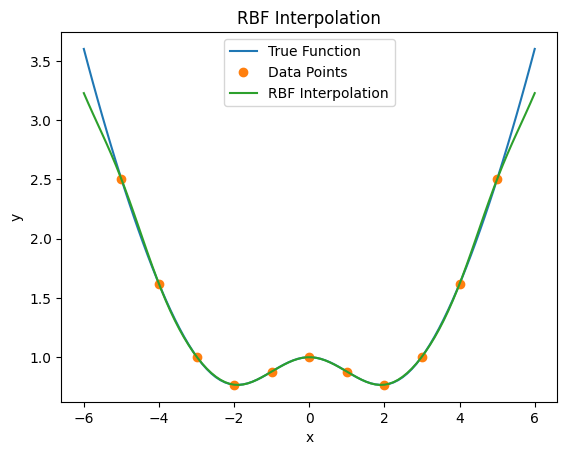

In [ ]:
# prompt: Use a numpy scipy.interpolate.RBFInterpolator over x_d and y_d and plot the result against the true function

import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator

# Create an RBFInterpolator object
print(len(np.array([y_d]).T))
rbf = RBFInterpolator(np.array([x_d]).T, y_d.T, kernel='gaussian', epsilon=1, degree=2)

# Interpolate at the x_toy values
y_rbf = rbf(np.array([x_toy]).T)

# Plot the results
plt.plot(x_toy, y_toy, label='True Function')
plt.plot(x_d, y_d, 'o', label='Data Points')
plt.plot(x_toy, y_rbf, label='RBF Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('RBF Interpolation')
plt.show()
